# Homework #3: 機率分配的樣貌

## 姓名：葉于廷
## 學號：410878048

<hr>

## 目標：

### -  繪製曾學過的分配函數，含連續與離散型。

### -  連續型分配包括常態、卡方、T、Beta、F 等五種。利用改變分配函數的參數，觀察其分配函數的「長相」；也就是窮極所有可能的「形狀」並說明（或標示）與參數間的關係。

### -  離散型則選擇 Poisson 分配。

### -  連續型分配函數繪圖以 PDF 為主。離散型分配含 PMF（stem 圖） 及 CDF （stairs 圖）。

### -  子圖與三維圖形的繪製

<hr>



## 套件說明
### - numpy - 處理矩陣及運算

### - scipy.stats - 有各種分配的函式，方便計算 pdf, cdf, pdf

### - matplotlib.pyplot - 繪圖工具

### - matplotlib.cm - 漸層色彩

In [112]:
import numpy as np
from scipy.stats import norm, chi2, beta, t, f, poisson
import matplotlib.pyplot as plt
from matplotlib import cm



## 1. 常態分配 Normal distribution

## $$X \sim N(\mu, \sigma^2)$$ 

<hr>

## pdf
## 常態分配是十分常見的分配，常會用來代表不明變數的分配。
## 特色是 pdf 呈現對稱鐘形分布，稱之為鐘形曲線
## - 不同的 $\mu$ 會造成分配平移
## - 不同的 $\sigma$ 會造成分配平移

<hr>

## 技巧運用
## - pdf 的值是用 broadcasting 的方式製造
## - 繪圖的方式是用 broadcasting 的技巧
## - label 的 list 產生方式使用 list comprehension (using for in one command)
## - subplot - 可繪製多個子圖在一張圖中。



Text(0.5, 1.0, 'Normal different sigma')

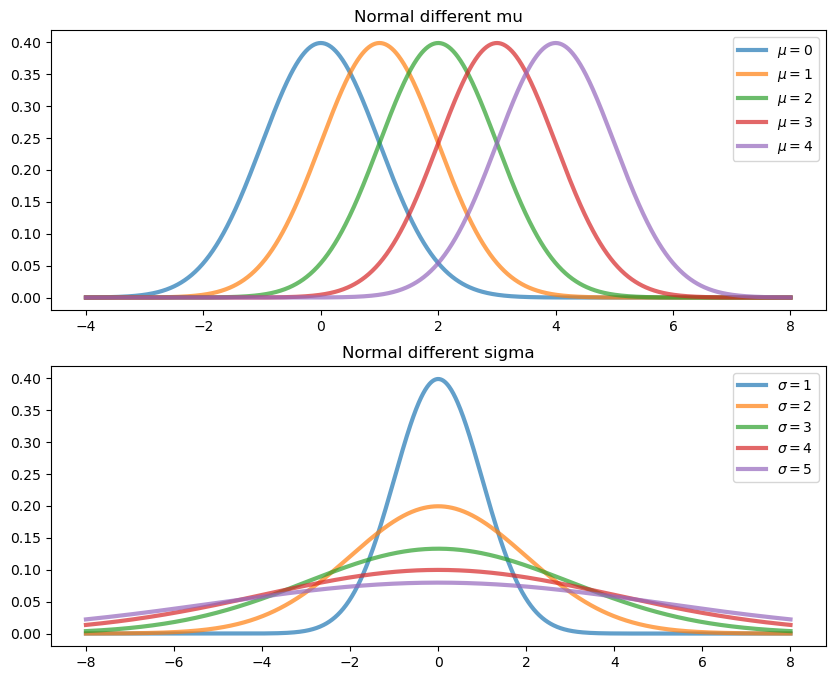

In [113]:
# pdf

# setting
fig, ax = plt.subplots(2, 1, figsize=(10,8))

# different mu
n = 1000
x = np.linspace(-4, 8, n).reshape(n, 1)
mu = np.arange(5)
y = norm.pdf(x, loc = mu)
mu_labels = ["$\mu = " + str(u) + "$" for u in mu]
ax[0].plot(x, y, lw = 3, alpha = 0.7)
ax[0].legend(mu_labels)
ax[0].set_title("Normal different mu")

# different sigma
x = np.linspace(-8, 8, n).reshape(n, 1)
sigma = np.arange(5) + 1
y = norm.pdf(x, scale = sigma)
sigma_labels = np.array(["$\sigma = " + str(u) + "$" for u in sigma])
ax[1].plot(x, y, lw = 3, alpha = 0.7)
ax[1].legend(sigma_labels)
ax[1].set_title("Normal different sigma")

<hr>

## cdf
## - 不同的 $\mu$ 會造成累積分配函數平移
## - 不同的 $\sigma$ 會造成累積分配函數累積的速度不同，越小的標準差分布越集中，則 cdf 的曲線越陡



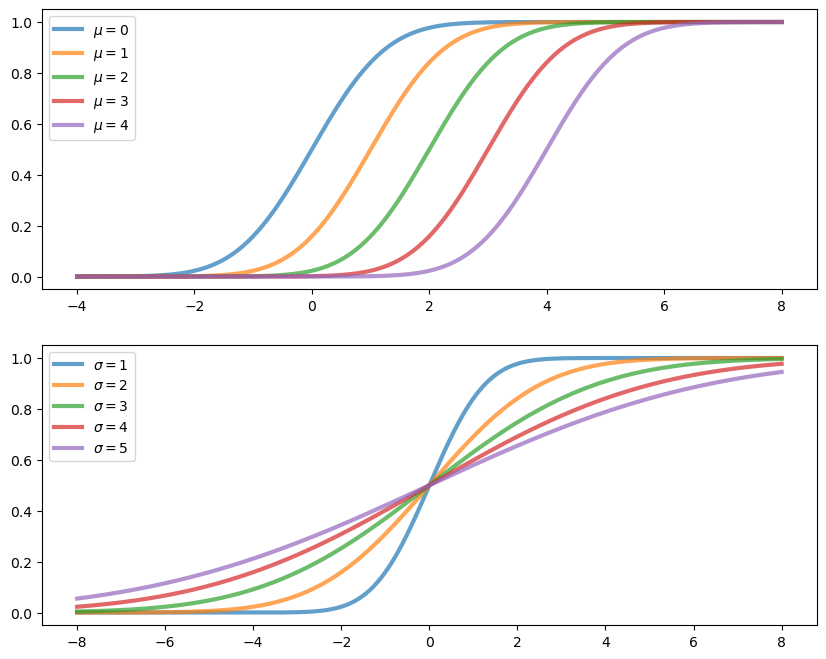

In [114]:
# setting
fig, ax = plt.subplots(2, 1, figsize=(10,8))

# cdf
z = np.linspace(-4, 8, n).reshape(n, 1)
F = norm.cdf(z , loc = mu)
ax[0].plot(z, F, lw = 3, alpha = 0.7)
ax[0].legend(mu_labels)
z = np.linspace(-8, 8, n).reshape(n, 1)
F = norm.cdf(z , scale = sigma)
ax[1].plot(z, F, lw = 3, alpha = 0.7)
ax[1].legend(sigma_labels)



# 2. 卡方分配 Chi-square distribution
## $$ X \sim \chi^2(df)$$

<hr>

## 卡方分配為 Gamma 的特例
## 可經由常態分配的平方獲得卡方自由度為一的分配
## 統計上常常利用這個分配進行推論和檢定
## 實務上 會用來執行皮爾森獨立檢定或皮爾森同質性檢定
## 卡方的圖形基本上是右偏的
## 越大的 df 會使得右偏的情形減緩
## 卡方分配具有相加性(兩個卡方相加為卡方的自由度相加)

<hr>

## 技巧運用
## - pdf 的值是用 broadcasting 的方式製造
## - 顏色是採用漸層色票 : Blues
## - 這裡不使用 broadcasting 畫圖 因為無法繪製顏色



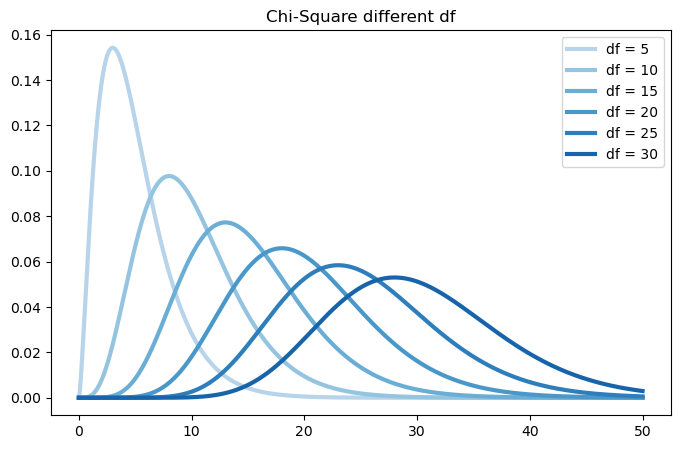

In [115]:
n = 1000
x = np.linspace(0, 50, n).reshape(n, 1)
df = np.arange(5, 31, 5) 
y = chi2.pdf(x, df = df)
df_labels = np.array(["df = " + str(u)  for u in df])
cmap = cm.get_cmap("Blues")
index = np.linspace(0.3, 0.8, np.size(df))
color1 = cmap(index)
plt.figure(figsize = [8, 5])
for i in range(np.size(df)):
    plt.plot(x, y[:,i], lw = 3, color = color1[i])
    plt.legend(df_labels)
    plt.title("Chi-Square different df")
plt.show()



# 3. 司徒頓t分布 t distribution
## $$ X \sim t(df)$$

<hr>

## 分布名字是由當時匿名為 student 發表所得
## 統計上常常利用這個分配進行未知母體的檢定
## 無法觀測到真正的母體變異，而用樣本變異取代之，此時轉換完的分布為t分配
## 自由度 30 時相當接近常態分配
## 越大的 df 會使得分布越來越高，靠近常態趨緩
## 自由度不為整數時依然存在，但實務上未使用。

<hr>

## 技巧運用
## - pdf 的值是用 broadcasting 的方式製造
## - 顏色是採用漸層色票 : Purples
## - 紅色線為常態分佈，可發現紫色線往那方向邁進



Text(0.5, 1.0, '$T$ different df')

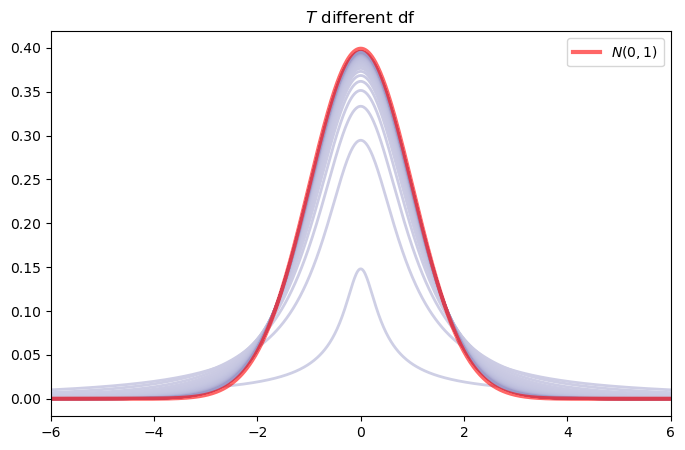

In [116]:
#%% T
# different df
n = 1000
x = np.linspace(-8, 8, n).reshape(n, 1)
df = np.arange(0.1, 31, 0.6) 
y = t.pdf(x, df = df)
cmap = cm.get_cmap("Purples")
index = np.linspace(0.3, 0.5, np.size(df))
colors = cmap(index)
df_labels = np.array(["df =  " + str(u)  for u in df])
plt.figure(figsize = [8, 5])
for i in range(np.size(df)):
    plt.plot(x, y[:,i], lw = 2, color = colors[i])
plt.plot(x, norm.pdf(x), lw = 3, color = "red"\
    , alpha = 0.6, label = r"$N(0, 1)$")    
plt.xlim(-6, 6)
plt.legend()
plt.title(r"$T$ different df")




# 4. 貝它分布 beta distribution
## $$ X \sim b(a, b)$$

<hr>

## beta 分配可經由兩個<b>獨立</b>的 gamma 分配轉換而成
## $$ X_1 \sim gamma(a, 1), X_2 \sim gamma(b, 1)$$
## $$ X_1\;and\;X_2\;are\;independent$$
## $$ beta(a, b) = \dfrac{X_1}{X_1 + X_2}$$
## beta 分配形狀多變 下列將展示三種類型



<hr>

## 技巧運用
## - 為了方便觀察繪製不同 a b 的 beta distribution 因此寫成函式
## - 顏色是採用漸層色票 : Greens
## - zip 是用來將 a b arrays 組成一個個 pairs
## - 可客製的決定是否出現 label, title 的名稱和圖的範圍


In [117]:
#%% beta 
n = 1000
def betadraw(a, b, axis = [], title = "", labelshow = False):
    x = np.linspace(0, 1, n).reshape(n, 1) 
    y = beta.pdf(x, a, b)
    a_b_labels = ["a = " + str(al) + r", b = " + str(be) for al, be in zip(a, b)]
    cmap = cm.get_cmap("Greens")
    index = np.linspace(0.3, 1, np.size(b))
    colors = cmap(index)
    plt.figure(figsize = [8, 5])
    for i in range(np.size(a)):
        plt.plot(x, y[:, i], color = colors[i])
    if axis:
        plt.axis(axis)
    if labelshow:
        plt.legend(a_b_labels, loc = "upper right")
    plt.title(title)
    plt.show()

## 鐘形樣貌

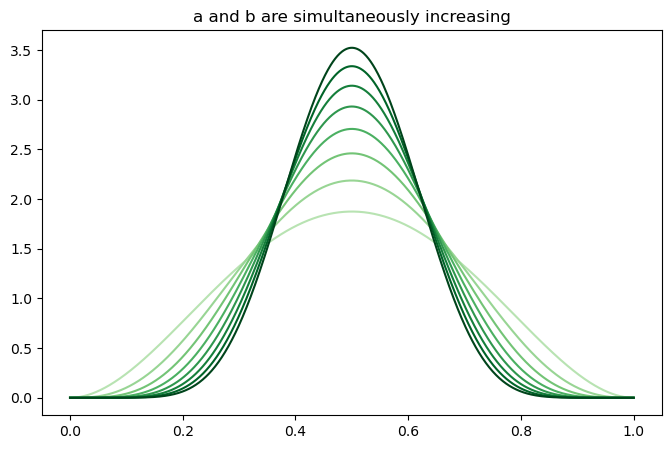

In [118]:
# bell shape
a = np.arange(3, 11)
b = np.arange(3, 11) 
betadraw(a, b, title = "a and b are simultaneously increasing")


## U 形樣貌

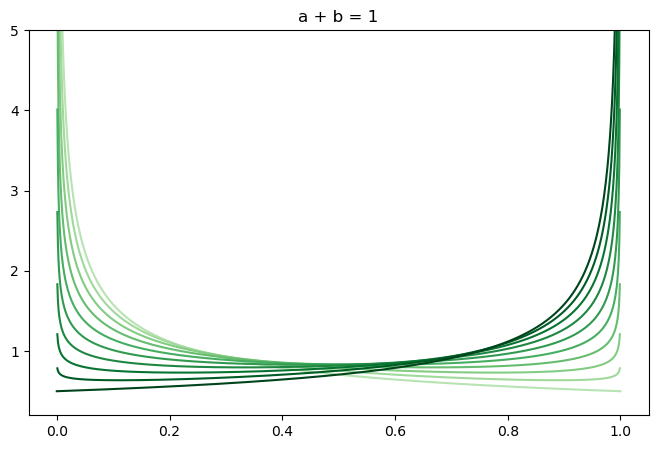

In [119]:
# u shape
a = np.linspace(0.5, 1, 10, endpoint = True)
b = np.linspace(1, 0.5, 10, endpoint = True)
betadraw(a, b, [-0.05, 1.05, 0.2, 5], title = "a + b = 1")

## 直線樣貌

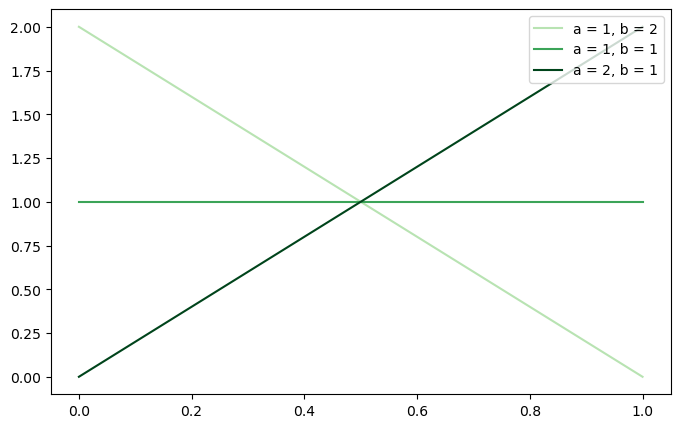

In [120]:
# straight lines
a = np.array([1, 1, 2])
b = np.array([2, 1, 1])
betadraw(a, b, labelshow = True)

<hr>

## 從三張圖觀察可發現 beta 分配具有 a b 參數的互換的對稱性 
## 以$x = 0.5$為中心

<hr>

## 技巧運用
## - 顏色是採用漸層色票 : PuOr


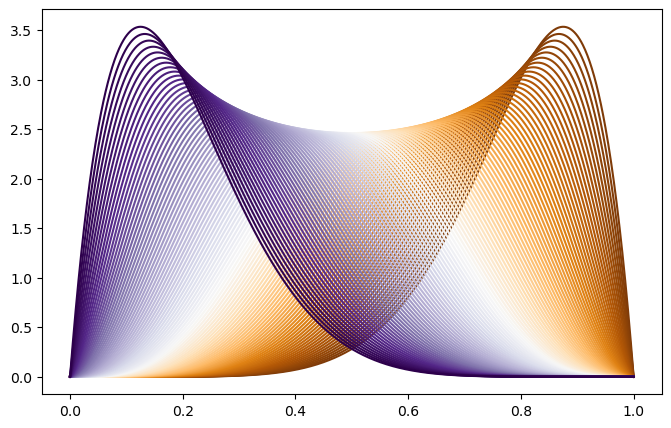

In [121]:
n = 1000
bodya = np.linspace(8, 2, 100, endpoint = True)
bodyb = np.linspace(2, 8, 100, endpoint = True)
x = np.linspace(0, 1, n).reshape(n, 1) 
y = beta.pdf(x, bodya, bodyb)
a_b_labels = ["a = " + str(al) + r", b = " + str(be) for al, be in zip(a, b)]
cmap = cm.get_cmap("PuOr")
index = np.linspace(0, 1, np.size(bodyb))
colors = cmap(index)
plt.figure(figsize = [8, 5])
for i in range(np.size(bodyb)):
        plt.plot(x, y[:, i], color = colors[i])



# 5. F-分布 F distribution
## $$ X \sim F(dfn, dfd)$$

<hr>

## F 分配可經由兩個<b>獨立</b>的卡方分配轉換而成
## $$ X_1 \sim \chi^2(dfn), X_2 \sim \chi^2(dfd)$$
## $$ X_1\;and\;X_2\;are\;independent$$
## $$ F(dfn, dfd) = \dfrac{X_1 / dfn}{X_2 / dfd}$$
## 常用於單因子變異數分析 ANOVA
## 自由度不為整數時依然存在，但實務上未使用。
## 兩個自由度增大，右偏會越來越不明顯


<hr>

## 技巧運用
## - 為了方便觀察繪製不同 dfd dfn 的 F distribution 因此寫成函式
## - 顏色是採用漸層色票 : Purples



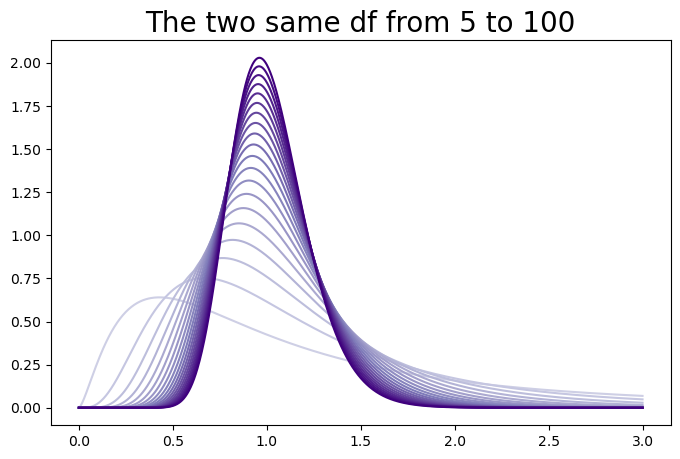

In [122]:
n = 1000
def fdraw(df1, df2, axis = [], showlabel = True, title = ""):
    x = np.linspace(0, 3, n).reshape(n, 1) 
    y = f.pdf(x, dfn = df1, dfd = df2)
    cmap = cm.get_cmap("Purples")
    index = np.linspace(0.3, 1, np.size(df1))
    colors = cmap(index)
    dfs_labels = ["$df_n$ = " + str(d1) + ", $df_d$ = " + str(d2) for d1, d2 in zip(df1, df2)]
    plt.figure(figsize = [8, 5])
    for i in range(np.size(df1)):
        plt.plot(x, y[:, i], color = colors[i])
    if axis:
        plt.axis(axis)
    if showlabel:
        plt.legend(dfs_labels, loc = "upper right", framealpha = 0.7)
    plt.title( title, fontsize = 20)
    plt.show()
dfn = np.arange(5, 101, 5)
dfd = np.arange(5, 101, 5) 
fdraw(dfn, dfd, showlabel = False, title = "The two same df from 5 to 100")

<hr>

## Reciprocal Property of F-distribution
## 當其中一個統計量 (x軸) 靠近0 另一條線的統計量 (x軸) 靠近無限大
## a 為右邊積到左邊的機率，-a 為右邊積到左邊的機率


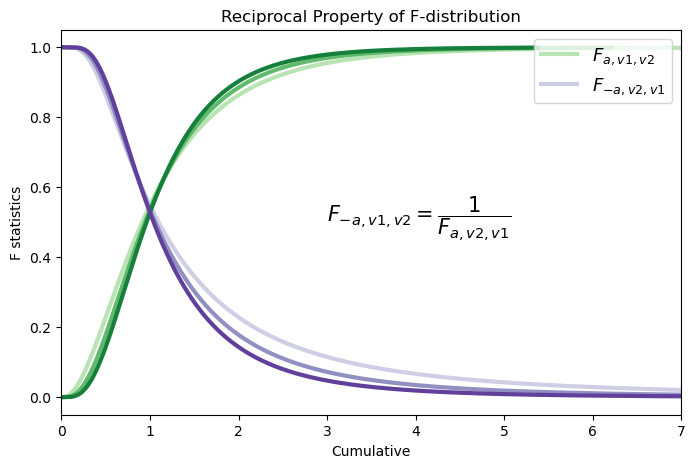

In [123]:
df1 = np.arange(5, 10, 2) 
df2 = np.arange(15, 20, 2)
prob = np.linspace(0, 1, n, endpoint = True).reshape(1000, 1)
cmap = cm.get_cmap("Greens")
index = np.linspace(0.3, 0.8, np.size(df1))
color1 = cmap(index)
cmap = cm.get_cmap("Purples")
index = np.linspace(0.3, 0.8, np.size(df1))
color2 = cmap(index)
plt.figure(figsize = [8, 5])
for i in range(np.size(df1)):
    y1 = f.ppf(prob, df1[i], df2[i])
    y2 = f.ppf(1 - prob, df2[i], df1[i])
    plt.plot(y1, prob, color = color1[i], lw = 3)
    plt.plot(y2, prob, color = color2[i], lw = 3)
plt.xlim((0, 7))
plt.ylabel("F statistics")
plt.xlabel("Cumulative")
plt.legend([r"$F_{a, v1, v2}$", r"$F_{-a, v2, v1}$"]\
    , loc = "upper right", prop={'size': 13})
plt.text(3, 0.5, r"$F_{-a, v1, v2} = \dfrac{1}{F_{a, v2, v1}}$"\
    , fontsize = 15)
plt.title("Reciprocal Property of F-distribution")
plt.show()



# 6. 卜瓦松分布 Poisson distribution
## $$ X \sim Poisson(\lambda)$$

<hr>

## Poisson 分配用來描述單位時間內事件發生的次數
## Poisson 事件間隔時間為 exponential 分配
## 在類別分析中，用於描述計數資料的分配，可用於建立模型


<hr>



## pdf

## 將不同參數的 Poisson 分配繪製在同一張圖上
## 非常難以看出改變的樣子
## 可使用多個子圖或三維繪圖解決
## $\lambda$ 越大 圖形往右移

<hr>

## 技巧運用
## - 這裡使用黑色背景 有專業之感
## - 顏色是採用較為亮色避免難以觀察



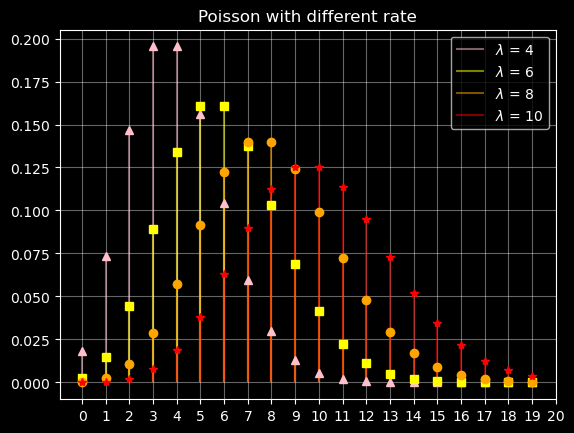

In [124]:
# discrete poisson
plt.style.use('dark_background')
plt.grid(True, alpha = 0.4)
nx = 20
x = np.arange(0, nx)
lam = np.array([4, 6, 8, 10]).reshape(4, 1)
n = np.size(lam)
ypmf = poisson.pmf(x , lam)
ycdf = poisson.cdf(x, lam)
colors = ["pink", "yellow", "orange", "red"]
shape = ["^", "s", "o", "*"]
for i in range(n):
    y = ypmf[i]
    plt.vlines(x, 0, y, color = colors[i]\
        , alpha = 0.5, label = r"$\lambda$ = {}".format(int(lam[i])))
    plt.plot(x, y, "o", color = colors[i]\
        , marker = shape[i])
ax = plt.gca()
ax.set_xticks(np.arange(0, 21, 1))
plt.title("Poisson with different rate")

plt.legend()
plt.show()


## 2x2子圖

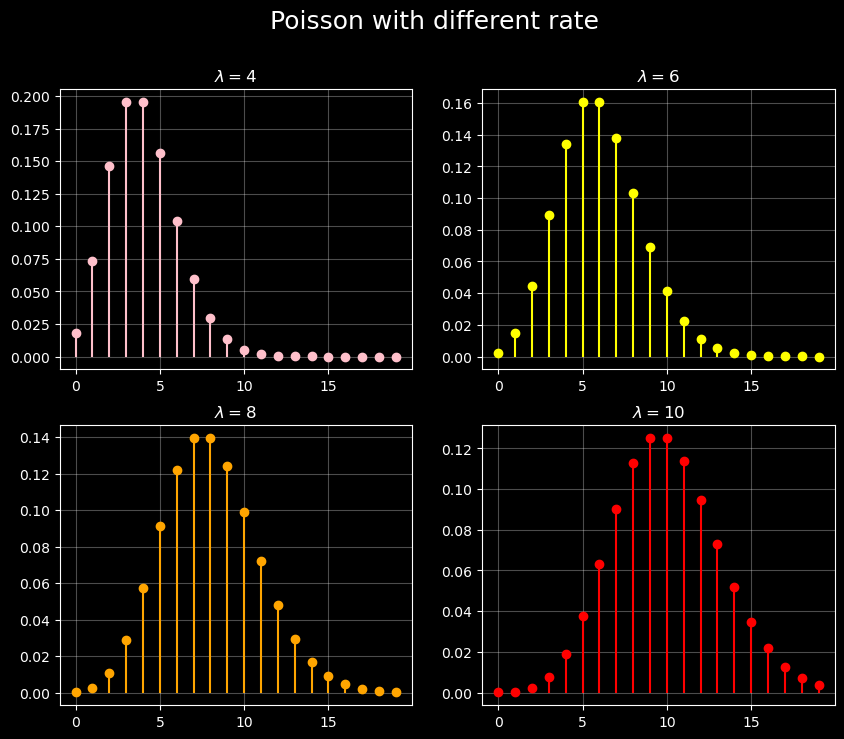

In [125]:
# Way1 4 subplots
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
k = 0
for row in range(2):
    for col in range(2):
     y = ypmf[k]
     ax[row, col].plot(x, y, "o", color = colors[k])
     ax[row, col].vlines(x, 0, y, color = colors[k])
     ax[row, col].set_title(r"$\lambda = {}$".format(int(lam[k])))
     ax[row, col].grid(alpha = 0.3)
     k = k + 1
plt.suptitle("Poisson with different rate", fontsize = 18)
plt.show()


## 三維繪圖

<hr>

## 技巧運用
## - 使用 plot.3D 繪製
## - rcParam 可調整邊框透明度
## - view_init 調整觀看角度
## - w_xaxis.pane.fill 將背景的白色給去除



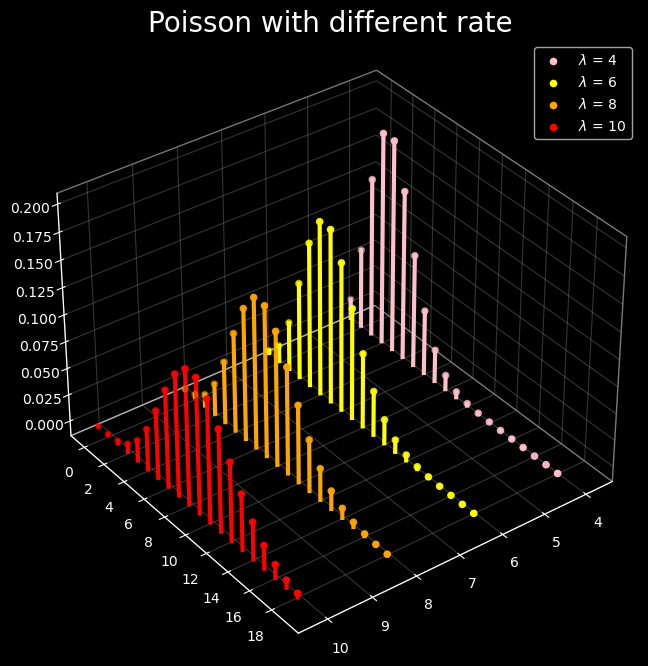

In [126]:
# Way2 three dimension
plt.figure(figsize = (10, 8))
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.4)
ax = plt.axes(projection='3d')
ax.view_init(35, 53)
for i in range(4):
    y = list(range(20))
    z = list(ypmf[i])
    x = [int(lam[i])+.315] * 20
    ax.scatter3D(x, y, z, c = colors[i]\
        , label = r"$\lambda$ = {}".format(int(lam[i])))
    for j in range(nx):
        zline = [0, z[j]]
        xline = x[:2]
        yline = [y[j]] * 2
        ax.plot3D(xline, yline, zline, c = colors[i], lw = 3)
plt.legend()
plt.title("Poisson with different rate", fontsize = 20)
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.set_yticks(np.arange(0, 20, 2))
ax.set_xlim(3.5, 10.5)
plt.show()




## cdf

## - 不同的 $\lambda$ 會造成累積分配函數累積的速度不同


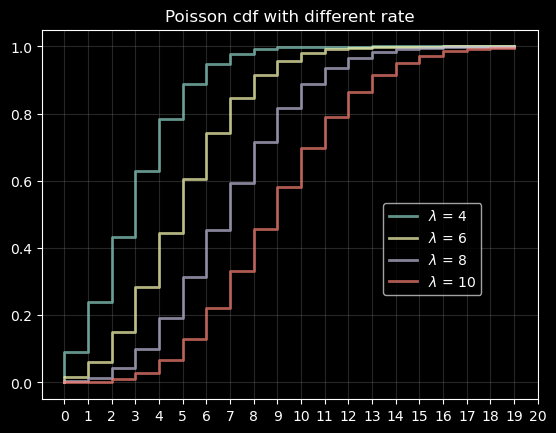

In [127]:
nx = 20
x = np.arange(0, nx)
lam = np.array([4, 6, 8, 10]).reshape(4, 1)
n = np.size(lam)
ypmf = poisson.pmf(x , lam)
ycdf = poisson.cdf(x, lam)
for j in range(n):
    y = ycdf[j]
    plt.step(x, y, alpha = 0.7, lw = 2, \
        label = r"$\lambda$ = {}".format(int(lam[j])) )
plt.legend(bbox_to_anchor = (0.9, 0.55))
ax = plt.gca()
ax.set_xticks(np.arange(0, 21, 1))
ax.grid(alpha = 0.3)
plt.title("Poisson cdf with different rate")
plt.show()
plt.style.use("default")